In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [179]:
df = pd.read_csv("mcdonalds.csv")
df.drop_duplicates()
df.shape



(1453, 15)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [181]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [182]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [183]:
age_groups = []
for age in df['Age']:
    age_groups.append(str(round(age/10))+'0s')

print(len(age_groups))
age_groups

1453


['60s',
 '50s',
 '60s',
 '70s',
 '50s',
 '60s',
 '60s',
 '20s',
 '60s',
 '30s',
 '50s',
 '30s',
 '60s',
 '50s',
 '70s',
 '50s',
 '30s',
 '30s',
 '50s',
 '40s',
 '40s',
 '40s',
 '20s',
 '50s',
 '40s',
 '40s',
 '20s',
 '30s',
 '60s',
 '20s',
 '40s',
 '40s',
 '60s',
 '40s',
 '50s',
 '50s',
 '40s',
 '50s',
 '40s',
 '60s',
 '30s',
 '60s',
 '70s',
 '40s',
 '60s',
 '40s',
 '50s',
 '70s',
 '30s',
 '70s',
 '40s',
 '30s',
 '60s',
 '50s',
 '50s',
 '60s',
 '50s',
 '50s',
 '50s',
 '30s',
 '30s',
 '20s',
 '20s',
 '50s',
 '20s',
 '30s',
 '50s',
 '20s',
 '50s',
 '60s',
 '60s',
 '60s',
 '60s',
 '40s',
 '50s',
 '40s',
 '60s',
 '60s',
 '40s',
 '40s',
 '50s',
 '60s',
 '50s',
 '60s',
 '20s',
 '70s',
 '50s',
 '50s',
 '40s',
 '70s',
 '40s',
 '40s',
 '40s',
 '40s',
 '30s',
 '20s',
 '60s',
 '30s',
 '50s',
 '30s',
 '50s',
 '40s',
 '40s',
 '60s',
 '70s',
 '50s',
 '40s',
 '40s',
 '60s',
 '60s',
 '60s',
 '30s',
 '60s',
 '60s',
 '40s',
 '60s',
 '50s',
 '40s',
 '20s',
 '50s',
 '20s',
 '50s',
 '60s',
 '50s',
 '20s',


In [184]:
df['ageGroup'] = age_groups
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,ageGroup
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,60s
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,50s
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,60s
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,70s
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,50s


c:\Users\Bhai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bhai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bhai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='count'>

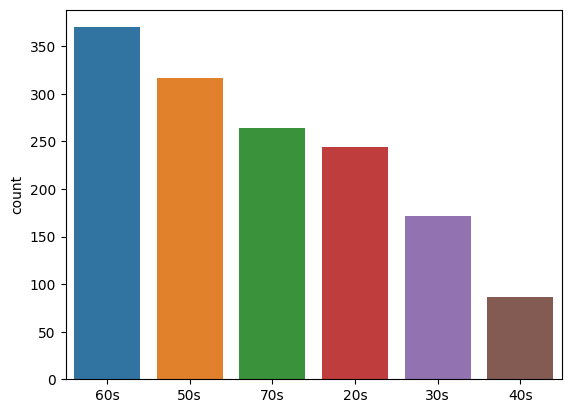

In [185]:

sns.barplot(x=df["ageGroup"].unique(),y=df["ageGroup"].value_counts())
# df["ageGroup"].unique()

In [186]:
# index = 0
# freq_dic = {}
# for i in df.VisitFrequency.unique():
#     freq_dic[i] = index
#     index += 1

# # frequency is given dummy

# like_lis = []
# for j in df.Like:
#     if j == '0':
#         like_lis.append(0)
#     elif j[-2] == '-':
#         like_lis.append(int('-'+j[-1]))
#     else:
#         like_lis.append(int(j[-1]))



In [187]:
mod_df = df
mod_df.yummy = df.yummy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.convenient = df.convenient.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.spicy = df.spicy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.fattening = df.fattening.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.greasy = df.greasy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.fast = df.fast.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.cheap = df.cheap.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.tasty = df.tasty.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.healthy = df.healthy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.disgusting = df.disgusting.replace(to_replace=["No","Yes"], value=[0,1])

# mod_df.VisitFrequency = df.VisitFrequency.replace(freq_dic)
# mod_df.Like = like_lis

mod_df.drop(columns=["expensive","Like","Age","VisitFrequency","Gender","ageGroup"],axis=1,inplace=True)
mod_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,disgusting
0,0,1,0,1,0,1,1,0,0,0
1,1,1,0,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,0
3,1,1,0,1,1,1,1,1,0,1
4,0,1,0,1,1,1,1,0,1,0


Text(0.5, 1.0, 'Distance of different K Values')

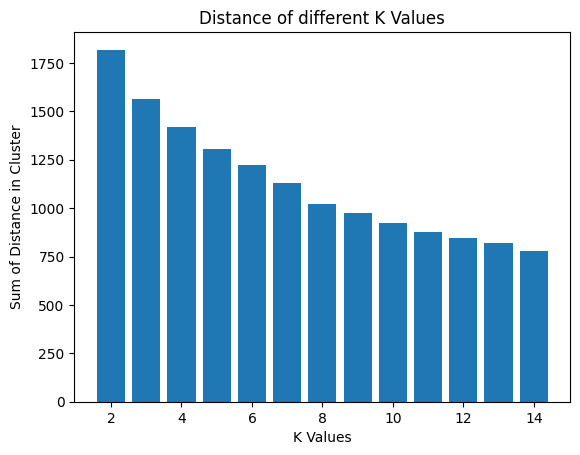

In [188]:
k_values = range(2, 15)
inertia_values = []
labels = []
for k in k_values:
    kmeansModel = KMeans(n_clusters=k, n_init=10, random_state=2)
    labels = kmeansModel.fit_predict(mod_df)
    inertia_values.append(kmeansModel.inertia_)

plt.bar(k_values, inertia_values)
plt.xlabel("K Values")
plt.ylabel("Sum of Distance in Cluster")
plt.title("Distance of different K Values")

TypeError: Singleton array array(0.2) cannot be considered a valid collection.